# Sales and Customer Data Visualization

## Description:

This project utilizes Matplotlib to visualize sales data alongside daily customer counts and working days over a span of several months. The plot is designed to provide insights into sales performance and customer engagement metrics over time.


## Importing Libraries and Dataset into Jupyter Notebook

To begin our analysis, we need to import the necessary libraries and load our dataset into the Jupyter Notebook environment. We will be using Python's Pandas library for data manipulation and Matplotlib for data visualization.


In [1]:
import pandas as pd
from matplotlib import pyplot as plt
import matplotlib.ticker as ticker

In [2]:
df = pd.read_excel("Days.xlsx")
df.head()

,Day of the Month,Working Days,Sales,No of Customers,Sales/Customer,Payments,Day of the Month.1,Working \nDays,Sales.1,No of Customers.1,...,Sales.10,No of Customers.10,Sales/Customer.10,Payments.10,Day of the Month.11,Working \nDays.10,Sales.11,No of Customers.11,Sales/Customer.11,Payments.11
0,1,NaN,NaN,NaN,NaN,NaN,1,NaN,NaN,NaN,...,400000000.0,NaN,NaN,NaN,1.0,1.0,400000000.0,NaN,NaN,NaN
1,2,NaN,NaN,NaN,NaN,NaN,2,NaN,NaN,NaN,...,400000000.0,NaN,NaN,NaN,2.0,1.0,400000000.0,NaN,NaN,NaN
2,3,NaN,NaN,NaN,NaN,NaN,3,NaN,NaN,NaN,...,400000000.0,NaN,NaN,NaN,3.0,1.0,400000000.0,NaN,NaN,NaN
3,4,NaN,NaN,NaN,NaN,NaN,4,1.0,190982017.0,74.0,...,400000000.0,NaN,NaN,NaN,4.0,NaN,NaN,NaN,NaN,NaN
4,5,1.0,86492616.0,17.0,5.087801e+06,NaN,5,1.0,639034903.0,94.0,...,NaN,NaN,NaN,NaN,5.0,1.0,400000000.0,NaN,NaN,NaN


The following code snippet extracts specific columns from a DataFrame `df` and assigns them to individual DataFrames

Each DataFrame(df1 to df12) are representing Persian month names, from "Farvardin" to "Esfand":

In [3]:
df1 = df.loc[:,'Day of the Month':'Payments']
df2 = df.loc[:,'Day of the Month.1':'Payments.1']
df3 = df.loc[:,'Day of the Month.2':'Payments.2']
df4 = df.loc[:,'Day of the Month.3':'Payments.3']
df5 = df.loc[:,'Day of the Month.4':'Payments.4']
df6 = df.loc[:,'Day of the Month.5':'Payments.5']
df7 = df.loc[:,'Day of the Month.6':'Payments.6']
df8 = df.loc[:,'Day of the Month.7':'Payments.7']
df9 = df.loc[:,'Day of the Month.8':'Payments.8']
df10 = df.loc[:,'Day of the Month.9':'Payments.9']
df11 = df.loc[:,'Day of the Month.10':'Payments.10']
df12 = df.loc[:,'Day of the Month.11':'Payments.11']

In [4]:
df1.head()

,Day of the Month,Working Days,Sales,No of Customers,Sales/Customer,Payments
0,1,NaN,NaN,NaN,NaN,NaN
1,2,NaN,NaN,NaN,NaN,NaN
2,3,NaN,NaN,NaN,NaN,NaN
3,4,NaN,NaN,NaN,NaN,NaN
4,5,1.0,86492616.0,17.0,5.087801e+06,NaN


## DATA CLEANING
The `dfmaker` function is designed to process a list of dataframes (df1 to df12). It iterates through each dataframe, filters rows where the second column equals 1, and extracts specific columns (2nd and 3rd) while handling missing values. 

After processing each dataframe, it aggregates sales, calculates the average daily customers rounded to two decimal places, and counts the number of working days. 

The function then returns three lists: Sales, representing the total sales for each dataframe; Daily_Customers, representing the average daily customers; and Working_Days, representing the number of days each dataframe covers.


In [5]:
def dfmaker():
    l = [df1,df2,df3,df4,df5,df6,df7,df8,df9,df10,df11,df12]
    Working_Days = []
    Sales = []
    Daily_Customers = []
    for x in range(len(l)):
        filt = (l[x].iloc[:,1] == 1)
        l[x] = l[x][filt].iloc[:,2:4].fillna(0).reset_index(drop=True)
        Sales.append(l[x].iloc[:,0].sum())
        Daily_Customers.append(l[x].iloc[:,1].mean().round(2))
        Working_Days.append(len(l[x]))
    return Sales , Daily_Customers, Working_Days

In [6]:
Months = ["Farvardin", "Ordibehesht", "Khordad", "Tir", "Mordad", "Shahrivar", "Mehr", "Aban", "Azar", "Dey", "Bahman", "Esfand"]
Sales = dfmaker()[0]
Daily_Customers = dfmaker()[1]
Working_Days= dfmaker()[2]
m = sum(Daily_Customers)/10 
Daily_Customers[10:12] = [m,m]

## VISUALIZATION:

This code utilizes Matplotlib to create a dual-axis plot visualizing sales data alongside daily customer counts and working days over several months. The `plt.style.use('fivethirtyeight')` command sets the visual style of the plot to match the "fivethirtyeight" theme.

### Steps:

1. **Defining Figure and Axes:**
   - `fig, ax1 = plt.subplots(figsize=(20, 10))`: Initializes the figure and primary axis (`ax1`) with a specified size.
   - `bars = ax1.bar(Months, Sales, label='Sales', width=0.5)`: Plots the sales data as vertical bars on the primary axis.

2. **Adding Annotations:**
   - Annotations are added to the secondary axis (`ax2`) for both daily customer counts and working days. The annotations display the counts below the corresponding markers on the plot.

3. **Plotting Secondary Data:**
   - `ax2.plot(Months, Daily_Customers, label='Daily Customers', color='red', marker='o', markersize=10)`: Plots the daily customer counts on the secondary axis with red markers.
   - `ax2.plot(Months, Working_Days, label='Working_Days', color='orange', marker='o', markersize=10)`: Plots the working days on the secondary axis with orange markers.

4. **Legend and Labels:**
   - `ax1.legend(loc='upper left')` and `ax2.legend(loc='upper right')`: Adds legends to the respective axes.
   - `ax1.set_xlabel('Months')`, `ax1.set_ylabel('Sales')`, `ax2.set_ylabel('Counts')`: Sets labels for the axes.
   - `ax1.set_title('Sales and Customer Data')`: Sets the title of the plot.

5. **Formatting and Display:**
   - `plt.grid()`: Adds a grid to the plot.
   - `plt.tight_layout()`: Adjusts the layout to prevent overlapping elements.
   - `plt.savefig('Sales_and_Customer_Data.png')`: Saves the plot as an image file.
   - `plt.show()`: Displays the plot.

This code provides a clear visualization of sales data alongside related customer metrics, facilitating easy interpretation and analysis.


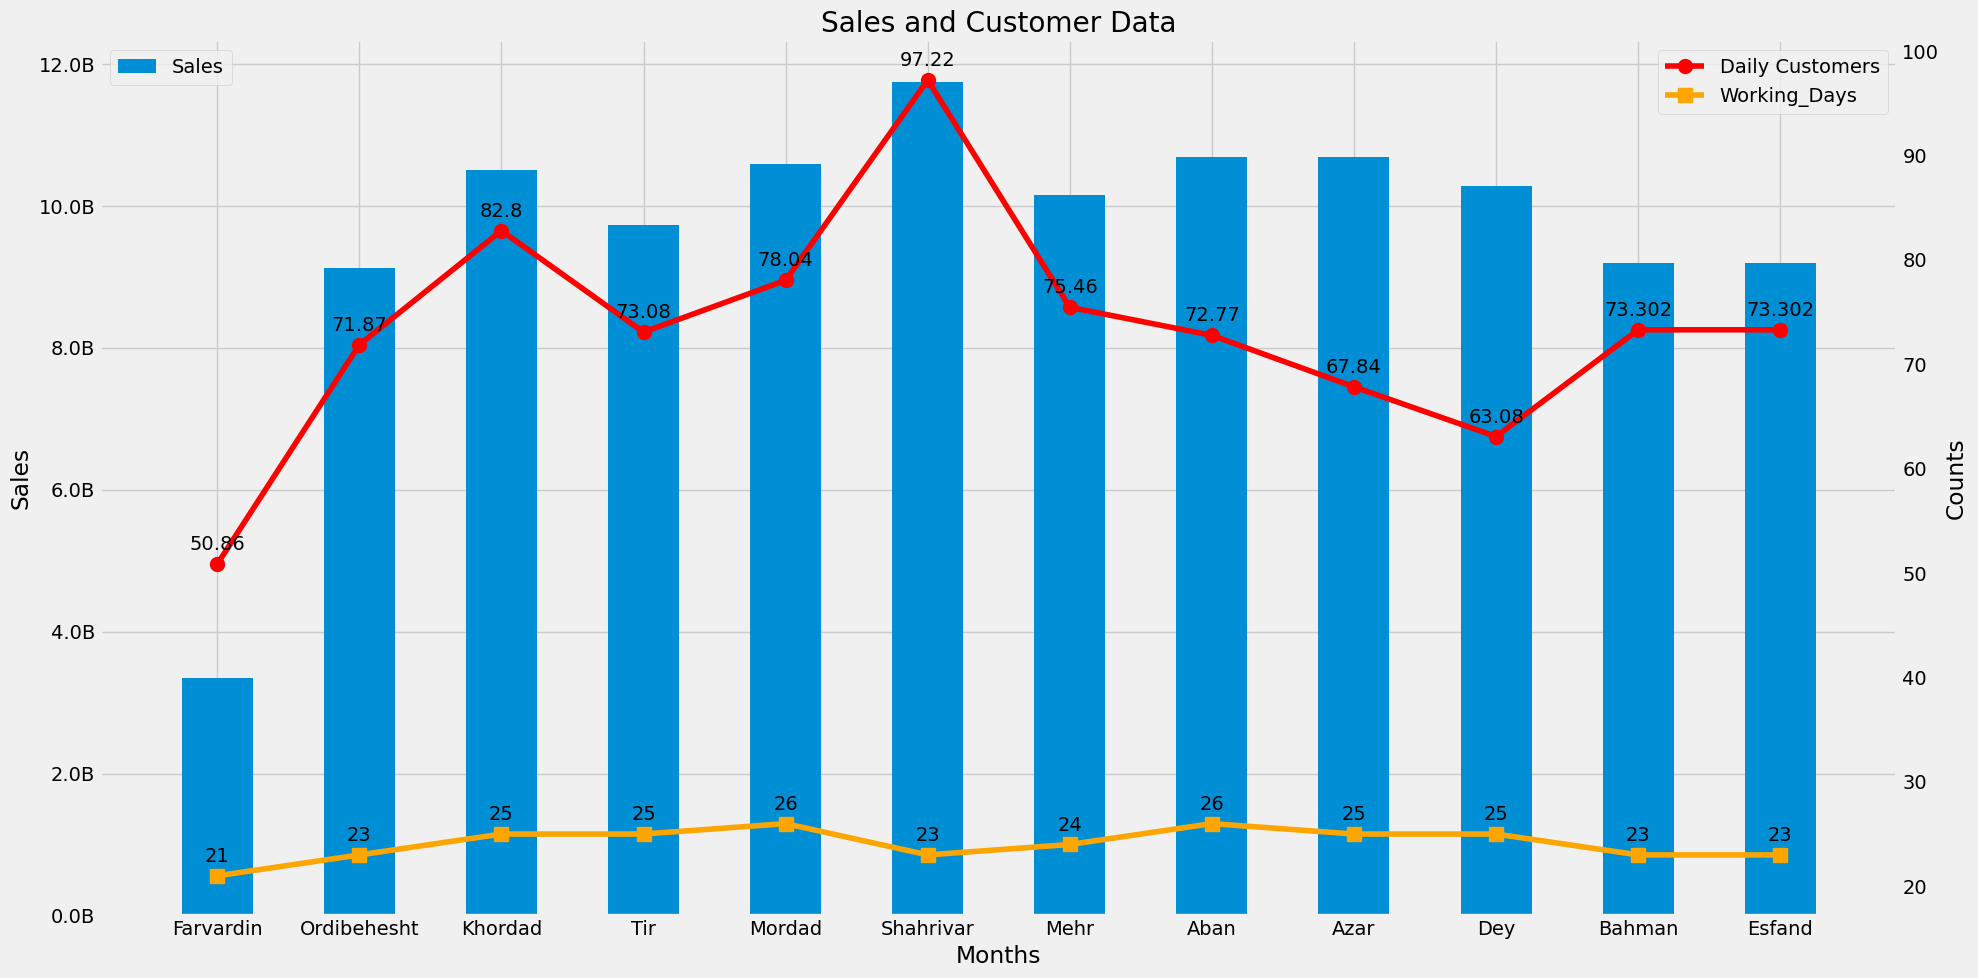

In [7]:
plt.style.use('fivethirtyeight')
fig, ax1 = plt.subplots(figsize=(20, 10))
ax1.bar(Months,Sales ,label = 'Sales',width = 0.5)
ax2 = ax1.twinx()

for x, y in zip(Months, Daily_Customers):
    ax2.annotate('{}'.format(y), (x, y), textcoords="offset points", xytext=(0,10), ha='center')
for x, y in zip(Months, Working_Days):
    ax2.annotate('{}'.format(y), (x, y), textcoords="offset points", xytext=(0,10), ha='center')

                 
    
ax2.plot(Months,Daily_Customers ,label = 'Daily Customers',color='red',marker='o',markersize=10)
ax2.plot(Months,Working_Days, label = 'Working_Days',color='orange',marker='s',markersize=10)
ax1.legend(loc='upper left')
ax2.legend(loc='upper right')

ax1.set_xlabel('Months')
ax1.set_ylabel('Sales')
ax2.set_ylabel('Counts')
ax1.set_title('Sales and Customer Data')

formatter = ticker.FuncFormatter(lambda x, pos: '{:.1f}B'.format(x / 1e9))
ax1.yaxis.set_major_formatter(formatter)
plt.grid()
plt.tight_layout()
plt.savefig('Sales_and_Customer_Data.png')
plt.show()
